# <center>  Homework2 
### <center> WANG Yuwen sid: 1155201505

#### Q1

(1)

(array([1.514e+03, 1.388e+03, 1.462e+03, 1.364e+03, 1.311e+03, 1.159e+03,
        1.166e+03, 1.162e+03, 1.105e+03, 1.105e+03, 1.049e+03, 1.013e+03,
        9.010e+02, 8.690e+02, 8.300e+02, 7.900e+02, 7.190e+02, 7.000e+02,
        6.840e+02, 6.750e+02, 6.440e+02, 5.660e+02, 5.470e+02, 5.360e+02,
        4.660e+02, 4.820e+02, 3.980e+02, 4.260e+02, 3.830e+02, 3.530e+02,
        3.300e+02, 3.100e+02, 2.510e+02, 2.810e+02, 2.540e+02, 2.510e+02,
        2.150e+02, 1.800e+02, 1.760e+02, 1.630e+02, 1.390e+02, 1.660e+02,
        1.380e+02, 1.300e+02, 1.070e+02, 9.500e+01, 9.800e+01, 7.200e+01,
        7.900e+01, 7.200e+01, 7.900e+01, 6.300e+01, 6.100e+01, 5.400e+01,
        3.800e+01, 4.900e+01, 4.100e+01, 4.600e+01, 3.100e+01, 2.800e+01,
        2.300e+01, 2.100e+01, 2.600e+01, 1.800e+01, 1.400e+01, 1.200e+01,
        9.000e+00, 1.500e+01, 1.200e+01, 9.000e+00, 1.000e+01, 1.300e+01,
        7.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 5.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 2.000e+0

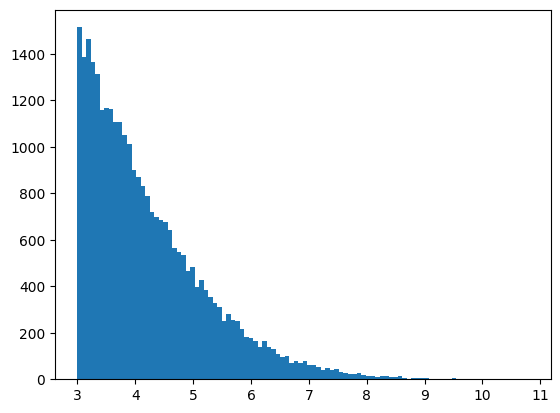

In [20]:
import numpy as np
import scipy
from functools import cache
from pynverse import inversefunc
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
mu=1
c=3
sigma=np.sqrt(5)

def cdf(x):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

def cdf_truc(x):
    return (cdf(x)-cdf(c))/(1-cdf(c))

def transform(u):
    return inversefunc(cdf_truc, u)

sample_size=30000
y =  scipy.stats.uniform.rvs(size=sample_size)  
y=transform(y)     
plt.hist(y, bins=100)

(2)

0.2252


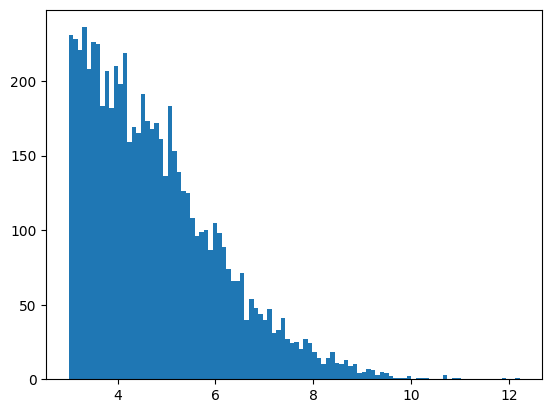

In [38]:
sample_size=30000
alpha=1
M=12
def pdf_f(x):
    if x<c:
        return 0
    else:
        return scipy.stats.norm.pdf(x, loc=c, scale=sigma)/(1-cdf(c))
def g(x):
    return scipy.stats.expon.pdf(x, loc=c, scale=alpha)

y = scipy.stats.expon.rvs(loc=c, scale=alpha, size=sample_size)
u = scipy.stats.uniform.rvs(size=sample_size)
x=[]
for i in range(sample_size):
    if u[i]<pdf_f(y[i])/(M*g(y[i])):
        x.append(y[i])
plt.hist(x, bins=100)
print(len(x)/sample_size)